# Multi-Model Darknet Traffic Analysis

## Introduction

This project is an analysis of the [CIC-Darknet2020](https://www.kaggle.com/datasets/peterfriedrich1/cicdarknet2020-internet-traffic/data) data-set. The aim of this project is to develop machine learning models that can identify different types of internet traffic, such as traffic routed through darknets (like TOR) or VPNs. These models can be used to provide insights on potential malicious behavior, which is often associated with dark/deep web activity and IP masking through VPNs. Due to the major surge in cyber attacks and malicious/illegal internet activity over the past decade, it is extremely valuable to be able to identify patterns in network traffic and look for indications of suspicious behavior.

Darknet and VPN services are not necessarily malicious in nature and may be used simply by the general user to remain anonymous on the internet. However, cybercriminals can also take advantage of these tools to avoid detection, which can harm people using them for benign activities. As more of the world becomes connected to the internet, it is important that we are armed with the tools for maintaining user safety and privacy.

## Approach

This project will be separated into the following segments:

* Data exploration and cleaning (EDA)
* Data processing
* Model selection and implementation
* Analyzing and interpreting results

We will examine the data set to identify and explain the different features. Some data points may be incomplete or inputted improperly, which will require some steps of cleaning and/or manipulation. We will attempt to train different types of models, some of which may fit the data better than others.

### Importing libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
# Load data
fp = "..//data/Darknet.CSV"
data = pd.read_csv(fp,on_bad_lines='skip')

# Data size
print(f"Data size : {data.shape[0]} data points, {data.shape[1]} columns")

# Show the first 5 data points
data.head()

Data size : 141530 data points, 85 columns


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


Data-set: [CIC-Darknet2020 Internet Traffic](https://www.kaggle.com/datasets/peterfriedrich1/cicdarknet2020-internet-traffic/data)

The data-set contains 141530 data points with 83 features and 2 labels. The labels describe the source of the traffic (`Label`) and the type of activity of traffic (`Label.1`). The descriptions for some of the features are the following:

* `Src IP`: IP address of the traffic source
* `Src Port`: Source Port
* `Dst IP`: IP address of the traffic destination
* `Dst Port`: Destination port
* `Protocol`: Internet Protocol
* `Timestamp`: Traffic timestamp
* `Flow Duration`: Time elapsed
* `Total Fwd Packet`: Number of packets

### Data Cleaning and Exploratory Data Analysis

In [3]:
# Check for missing values
missing_val = data.isna().sum()
print(missing_val[missing_val > 0])

Flow Bytes/s    47
dtype: int64


In [4]:
data = data.dropna()

# Check that null values were dropped
print(f"Data size : {data.shape[0]} data points, {data.shape[1]} columns")

Data size : 141483 data points, 85 columns


In [5]:
# Inspect features
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

#### Traffic protocol type

In [6]:
# Type of protocol
protocols = data["Protocol"]
np.unique(protocols, return_counts=True)

(array([ 0,  6, 17], dtype=int64), array([  799, 84274, 56410], dtype=int64))

The data consists of traffic routed through 3 different protocols. For the purposes of implementing the models, we can keep the numerical value assignments. For informational and data exploration purposes, the protocol assignments are:

* `0`: **HOPOPT** - IPv6 Hop-by-Hop Option
* `6`: **TCP** - Transmission Control Protocol
* `17`: **UDP** - User Datagram Protocol

TCP and UDP are the most commonly used network protocols, and most of the traffic in this data are routed through them.

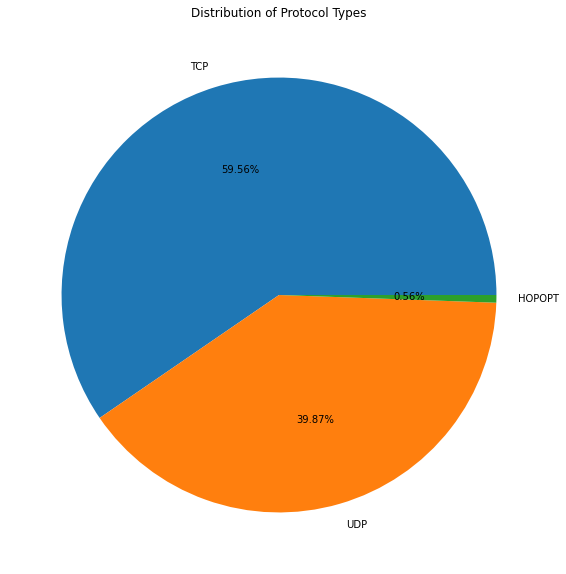

In [7]:
proto_map = {0: "HOPOPT",
             6: "TCP",
             17: "UDP"}

proto_names = [proto_map[i] for i in protocols]
proto_counts = pd.Series(proto_names).value_counts()

plt.figure(figsize=(10,10))
plt.pie(proto_counts, labels=proto_counts.index, autopct="%1.2f%%")
plt.title("Distribution of Protocol Types")
plt.show()

#### Traffic source and activity type

In [8]:
# Traffic source and activity
traffic_source = data["Label"]
traffic_activity = data["Label.1"]

In [9]:
np.unique(traffic_source)

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [10]:
np.unique(traffic_activity)

array(['AUDIO-STREAMING', 'Audio-Streaming', 'Browsing', 'Chat', 'Email',
       'File-Transfer', 'File-transfer', 'P2P', 'VOIP', 'Video-Streaming',
       'Video-streaming'], dtype=object)

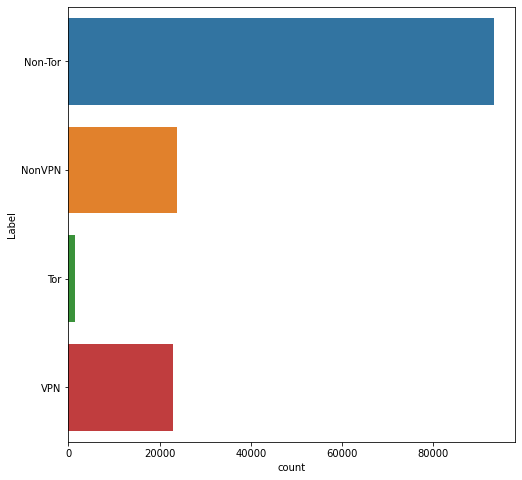

In [11]:
# Traffic source counts
plt.figure(figsize=(8, 8))
sns.countplot(y=traffic_source, data=traffic_source)
plt.show()

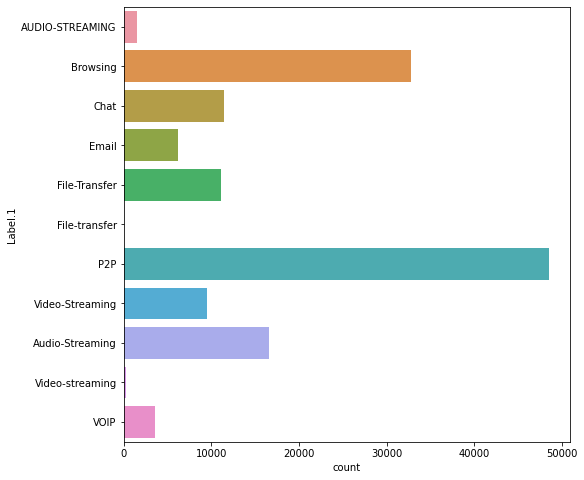

In [12]:
# Traffic activity counts
plt.figure(figsize=(8, 8))
sns.countplot(y=traffic_activity, data=traffic_activity)
plt.show()

The sources of network traffic belong to four different categories:

* `Non-Tor`
* `NonVPN`
* `Tor`
* `VPN`

The `Tor` category refers to traffic that was routed through the [Tor](https://en.wikipedia.org/wiki/Tor_(network)) overlay network, which is used for anonymous communication. This is often referred to as a "dark-net", hence the data set name. The `VPN` category refers to traffic that is encrypted using a VPN (virtual private network) service, which masks IP and location. Traffic that are in the `Tor` and `VPN` categories are not inherently malicious, however, illegal activities can be associated with them due to their anonynimity and IP concealing capabilities.

The types of activity consists of internet browsing, data/content transfer/sharing, emails, and online chats. For the purposes of this project, we are interested in building a model to differentiate anonymous/private vs non-anonymous/non-private network traffic. For this reason, we will use the `Label` (traffic source) column and drop the `Label.1` (activity type) column.

In [13]:
# Drop Label.1
data = data.drop(columns="Label.1")

### Feature Engineering

#### Combine Tor/VPN and Non-Tor/Non-VPN
To simplify our task, we will consider `Tor`/`VPN` and `Non-Tor`/`Non-VPN` traffic as the same categories. The new labels will be the following:
* `Tor`/`VPN` > `1` (anonymous)
* `Non-Tor`/`Non-VPN` > `0` (non-anonymous) 

In [14]:
# Combine Tor/VPN

label_mapping = {"Tor": 1,
                 "VPN": 1, 
                 "Non-Tor": 0,
                 "NonVPN": 0}

data["Label"] = data["Label"].map(label_mapping)

#### Remove irrelevant features
Some features such as source/destination IP addresses and timestamps do not provide relevant information on predicting the type of traffic (anonymous vs. non-anonymous). These features are highly specific to individual instances and can be difficult for our model to generalize. We will drop these columns from the data-set.

In [15]:
# Drop irrelevant features
irrelevant_features = ["Src Port", "Dst Port", "Timestamp", "Flow ID", "Src IP", "Dst IP"]
data = data.drop(columns=irrelevant_features)

#### One-hot encode features
The `Protocol` feature is a categorical is a variable represented by integers. The different categories do not have an ordinal relationship, but it may be implied due to the integers. To avoid problems that may arise from this, we can one-hot encode the `Protocol` feature. Each category will be transformed into a column, with possible values of `1` and `0` (`1` for the corresponding category, `0` for the rest).

In [16]:
# One-hot encode Protocol
one_hot = pd.get_dummies(data, columns=["Protocol"])
data = one_hot.iloc[:len(data)]

### Evaluating feature correlation
The data set contains 83 features, some of which may not be conducive to training an accurate model. Specifically, there may be features that are highly correlated, meaning multiple features can encode similar information. In a regression models, multi-collinearity (due to high correlation) can lead to unreliable predictions. While correlated features may not always impact the model's accuracy (depending on the type of model), we want to make sure our model is computationally efficient, not overly complex, and can generalize to new data.

We can look at feature correlation using a heatmap of every feature. To determine which features to remove, we can define a correlation threshold (usually defined 0.8-0.9) and remove feature with correlation above it.

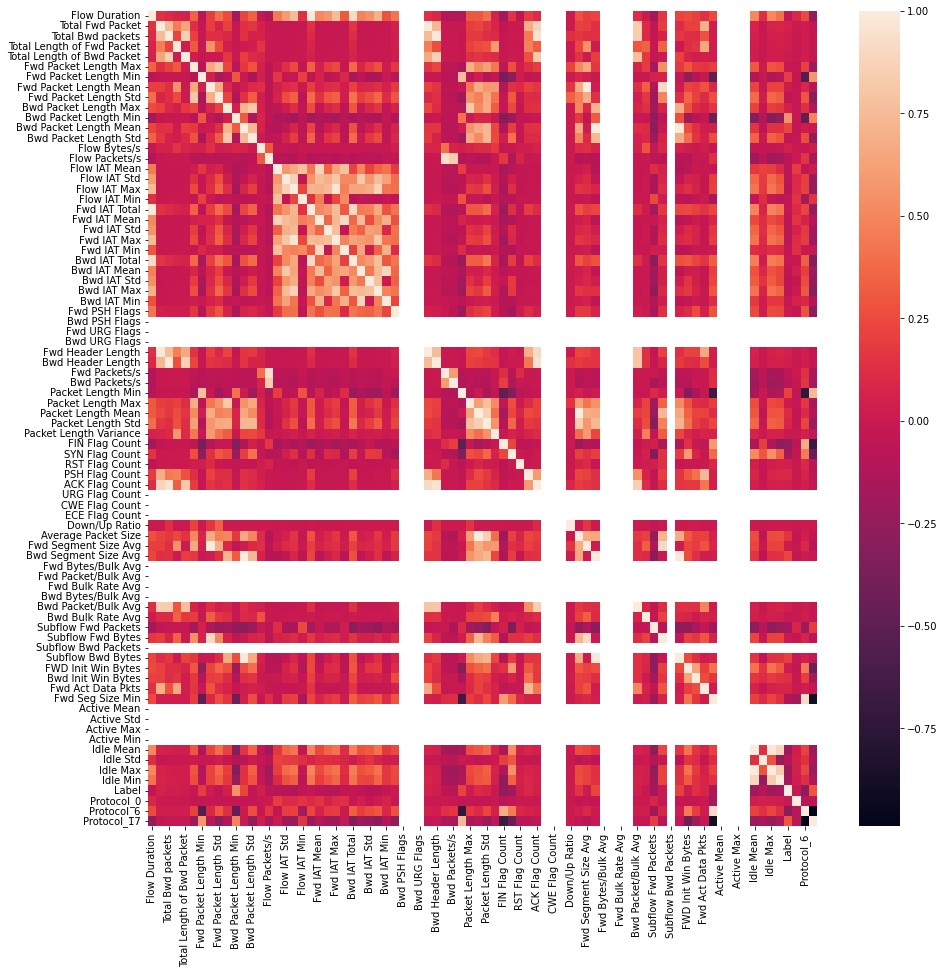

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())
plt.show()

In [18]:
threshold = 0.9
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features to be dropped
dropped_features = [feature for feature in upper_tri.columns if any(upper_tri[feature] > threshold)]
print(dropped_features)

['Fwd IAT Total', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'ACK Flag Count', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Idle Max', 'Protocol_6', 'Protocol_17']


In [19]:
# Drop highly correlated features
data = data.drop(columns=dropped_features)

### Data Preparation

In [20]:
# Split data into train and test sets
X = data.drop(columns=["Label"])
y = data["Label"]

# Replace inf and -inf values with max/min float values
X[X == np.inf] = np.finfo(np.float32).max
X[X == -np.inf] = np.finfo(np.float32).min

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", max_iter=1000, class_weight="balanced").fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)

In [22]:
# Accuracy
print(f"Logistic regression accuracy: {accuracy_score(y_test, log_reg_pred)}")

Logistic regression accuracy: 0.8279676290772874


#### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)

In [24]:
# Accuracy
print(f"Decision tree accuracy: {accuracy_score(y_test, dtree_pred)}")

Decision tree accuracy: 0.9450118387108174


#### k-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [26]:
# Accuracy
print(f"k-NN accuracy: {accuracy_score(y_test, knn_pred)}")

k-NN accuracy: 0.9627168957840053


#### Support Vector Machine

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1, gamma=1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

In [28]:
# Accuracy
print(f"SVM accuracy: {accuracy_score(y_test, svm_pred)}")

SVM accuracy: 0.8791391313566809


#### Support Vector Machine on data sub-set
Training a support vector machine on the full data-set is computationally expensive. To incorporate hyperparameter tuning for searching for the best parameters, we relax the problem by training on a small sub-set of the data. We will attempt to perform grid-search using 5000 examples.

In [29]:
# Hyperparameter tuning via GridSearch
from sklearn.model_selection import GridSearchCV

def run_grid_search():
    idx = range(0, 5000)

    X_sub = X_train.iloc[idx]
    y_sub = y_train[0:5000]

    grid_params = {"C": [0.1, 1, 10],
                   "gamma": [0.1, 1, 10],
                   "kernel": ["rbf", "linear", "sigmoid"]}

    grid_search = GridSearchCV(SVC(), grid_params, cv=5).fit(X_sub, y_sub)
    print("Best parameters:", grid_search.best_params)

In [30]:
# Timeout if code runs more than 30 minutes
import threading
limit = 1800

thread = threading.Thread(target=run_grid_search)
thread.start()
thread.join(timeout=limit)

if thread.is_alive():
    print("Exceeded time limit.")
else:
    print("Grid search completed.")

Exceeded time limit.


Even after reducing the data-set to 5000 examples, the GridSearch times out.

### Ensemble Methods

#### AdaBoost

In [31]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score

adaboost = AdaBoostClassifier(n_estimators=10, random_state=42)

In [32]:
# Adaboost cross-validation
adaboost_cross_val = cross_val_score(adaboost, X_train, y_train, cv=5)

print(f"AdaBoost accuracy: {np.mean(adaboost_cross_val)}")

AdaBoost accuracy: 0.9274380248453757


#### XGBoost

In [33]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric="mlogloss").fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print(f"XGBoost accuracy: {accuracy_score(y_test, xgb_pred)}")

XGBoost accuracy: 0.985334134360533


### Results and Analysis
Among the different models trained, `k-Nearest Neighbors`, `Decision Tree`, and `XGBoost` performed the best on unseen examples, with accuracy scores of `94.5%` and `96.3%`, and `98.5%`, respectively. The classification reports for the models are:

`k-Nearest Neighbors`:

In [34]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23429
           1       0.92      0.86      0.89      4868

    accuracy                           0.96     28297
   macro avg       0.94      0.92      0.93     28297
weighted avg       0.96      0.96      0.96     28297



`Decision Tree`:

In [35]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23429
           1       0.92      0.75      0.82      4868

    accuracy                           0.95     28297
   macro avg       0.93      0.87      0.90     28297
weighted avg       0.94      0.95      0.94     28297



`XGBoost`:

In [36]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23429
           1       0.97      0.95      0.96      4868

    accuracy                           0.99     28297
   macro avg       0.98      0.97      0.97     28297
weighted avg       0.99      0.99      0.99     28297



These models all exhibited high `precision` for both the `0` and `1` labels, meaning there were very few false positive predictions. The `Decision Tree` model suffered the most on `recall` for the `1` label, meaning it was somewhat susceptible to false negatives for this label. In every category (`accuracy`, `precision`, `recall`), the `XGBoost` model had the highest perfromance.

`Logistic Regression` showed the lowest performance, and inspecting the classification report showed that while the accuracy was still relatively high at `82.8%`, the model was only predicting the `0` label. This behavior is likely due to label imbalance in the data-set, that is, there were significantly more examples with the `0` label. 

In [37]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     23429
           1       0.00      0.00      0.00      4868

    accuracy                           0.83     28297
   macro avg       0.41      0.50      0.45     28297
weighted avg       0.69      0.83      0.75     28297



The `SVM` model predicted with `87.9%` accuracy without hyperparameter tuning. The model was training on `C=1`, meaning the decision boundary was very simple. I elected to not use hyperparameter tuning via `GridSearch` on the full data-set because it is computationally expensive and can take a long time to complete. This is due to the data-set containing a large number of examples (> 140,000) and many features, even after dropping highly correlated features.

### Discussion and Conclusion

Based on the accuracy scores of the various models, it appears that classifying anonymous/non-anonymous traffic is a relatively simple task, assuming proper algorithm selection and feature engineering. The problem may become more complex if I decided to retain the original labels (`Tor`, `Non-Tor`, `VPN`, `NonVPN`) and modeled a multi-class classification problem instead of a binary problem. From my perspective, differentiating between anonymity services (i.e. `Tor` vs. `VPN`) was not very meaningful because there can be many motivations (benign and malicious) for choosing between them. It can be difficult to determine whether traffic is malicious or not based on that choice. Differentiating between anonymous and non-anonymous traffic is a much simpler problem as it is a binary classification problem. From an internet safety perspective, traffic routed without using services such as Tor or VPNs are easier to track, meaning we can prioritize analytical resources towards traffic that our model predicts to be anonymized (and potentially malicious).

A limitation I encountered was the computation required to train certain models, specifically, support vector machines. The other models training relatively quickly, while the SVM required significantly more time, even with a simple decision boundary (i.e. `C=1`). This made it difficult to utilize hyperparameter tuning using the full data-set, as the data-set contained a large number of features and data points. Even after selecting a sub-set of the data (5000 rows), `GridSearchCV` still exceeded the time limit I defined. While the grid-search may complete if given a higher time limit, it may not be very meaningful to train a more complex SVM because the other models already have very high performance with much less computational time.

A potential way to improve the model is to train on data that indicates whether network traffic turned out to be malicious or benign. While it is useful to predict if traffic originated from a anonymized source, it does not necessarily provide information on its intent. Tor and VPNs are publicly available tools, and virtually anyone can use them for both benign and malicious purposes. Training models on malicious/benign labels in addition to Tor/VPN labels can provide better insights on the significance of anonymity and privacy tools on internet activity. Another way to improve the model is to consider other ensemble methods such as bagging and voting. Specifically, we can partition the data, train each sub-set separately on the same model, and take the average of the predictions (bagging). This can improve the final model's ability to generalize to new data. We can also implement voting, in which we train several different models and take the best averaged predictors from all the models. For the specific problem I chose, these extra steps may not be necessary due to high performance of my current models. However, they may offer meaningful improvements to models trained on more complex data and multi-label classification problems.